# Анализ сервиса аренды самокатов GoFast

В проекте исследуются данные о пользователях и поездках в сервисе аренды электросамокатов GoFast. Главная цель анализа - проверить различные гипотезы, которые могут способствовать развитию бизнеса и повышению его эффективности.

## Краткое резюме проекта:

Мы имеем доступ к данным о пользователях и поездках в сервисе GoFast, включающим информацию об имени, городе, возрасте, типе подписки, пройденном расстоянии, продолжительности поездки и других характеристиках пользователей, поездок и подписок.

Исходные данные находятся в трех датасетах: 1 датасет о пользователях (1565 строк, 5 признаков), 2 датасет по поездкам (18068 строк, 4 признака) и 3 датасет о видах подписок (2 строки, 4 признака). Во время анализа обратим внимание на информацию о количестве поездок, продолжительности поездок, типе подписки пользователей, а также исследуем другие характеристики, которые могут быть интересны для понимания действий пользователей с подпиской и без.

## План работы:

1. **Загрузка данных и первичный просмотр:**
   - Прочитаем и ознакомимся с данными для дальнейшего анализа.


2. **Предобработка данных:**
   - Изменим типы данных в столбцах, где это необходимо, для более удобного анализа.
   - Создадим новый столбец с номером месяца для удобного анализа по временным периодам.
   - Обработаем дубликаты.


3. **Исследовательский анализ данных (EDA):**
   - Проанализируем и визуализируем общую информацию о пользователях и их поездках.
   - Рассмотрим разные характеристики.


4. **Объединение данных:**
   - Создадим объединенный датасет со всей информацией и 2 отдельных, разделив пользователей по видам подписки.
   - Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.


5. **Подсчет выручки:**
   - Создадим столбец с помесячной выручкой для каждого пользователя.


6. **Проверка гипотез:**
   - Тратят ли пользователи с подпиской больше времени на поездки?
   - Превышает ли расстояние, которое проезжают пользователи с подпиской за одну поездку, оптимальное значение?
   - Будет ли помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки?
   - Проверка гипотезы о снижении обращений в поддержку.
   
На основе этого плана мы приступим к анализу данных сервиса аренды электросамокатов GoFast и выявим полезные инсайты, которые помогут улучшить работу бизнеса и обеспечить более удовлетворенные пользователи.

#### Шаг 1. Загрузка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import binom

In [ ]:
data_users = pd.read_csv('/datasets/users_go.csv')
data_rides = pd.read_csv('/datasets/rides_go.csv')
data_sub = pd.read_csv('/datasets/subscriptions_go.csv')

In [ ]:
# изучим данные в таблице о пользователях и их подписках
data_users.info()
data_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [ ]:
# изучим данные в таблице о поездках
data_rides.info()
data_rides.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [ ]:
# изучим данные в таблице о видах подписок
data_sub.info()
data_sub.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Вывод:**
После первичного просмотра данных, мы обнаружили, что в нашем проекте представлено 3 датасета, содержащих информацию о пользователях, поездках и подписках.

Первый датасет содержит следующие столбцы:
- `user_id`: уникальный идентификатор пользователя;
- `name`: имя пользователя;
- `age`: возраст пользователя;
- `city`: город, в котором пользователь зарегистрирован;
- `subscription_type`: тип подписки пользователя, которая может быть "free" или "ultra".

Второй датасет содержит информацию о поездках и имеет следующие столбцы:
- `user_id`: уникальный идентификатор пользователя, совершившего поездку;
- `distance`: расстояние, которое пользователь проехал в текущей поездке (в метрах);
- `duration`: продолжительность поездки (в минутах) - время с того момента, как пользователь начал поездку до момента её завершения;
- `date`: дата совершения поездки.

Третий датасет содержит информацию о подписках и включает следующие столбцы:
- `subscription_type`: тип подписки;
- `minute_price`: стоимость одной минуты поездки по данной подписке;
- `start_ride_price`: стоимость начала поездки;
- `subscription_fee`: стоимость ежемесячного платежа за подписку.

Отмечается, что в данных нет пропущенных значений. Однако, для более удобной работы с датами, нам потребуется перевести формат даты в соответствующий формат в Python.

Эти первичные выводы дают нам общее представление о структуре данных и позволяют нам приступить к следующим шагам анализа, включая предобработку данных и проведение исследовательского анализа данных.

#### Шаг 2. Предобработка данных

In [ ]:
# изменим формат записи даты
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')

In [ ]:
# создаем новый столбец 'month' с номером месяца
data_rides['month'] = data_rides['date'].dt.month

In [ ]:
# за какой год представленны данные?
data_rides['date'].dt.year.unique()

# за какие месяца?
data_rides['month'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Несмотря на то, что при чтении таблиц уже было видно отсутсвие пропущенных значений, было решено перепроверить этот факт на всякий случай.

In [ ]:
data_users.isna().sum()
data_rides.isna().sum()
data_sub.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [ ]:
# проверим данные на наличие дубликатов
data_users.duplicated().sum() # 31 дубликат
data_rides.duplicated().sum() # 0 дубликатов
data_sub.duplicated().sum() # 0 дубликатов

0

In [ ]:
# удалим явные дубликаты в датасете по пользователям
data_users = data_users.drop_duplicates().reset_index(drop=True)

**Вывод:**
По результатам предобработки данных, были выполнены следующие операции:

1. **Приведение столбца `date` к типу даты pandas:**
   Мы преобразовали столбец `date` в формат даты, что позволит нам удобно работать с временными данными и выполнять анализ на основе дат.

2. **Создание нового столбца с номером месяца:**
   Для удобства анализа по временным периодам, мы добавили новый столбец с номером месяца на основе информации из столбца `date`. Таким образом, мы сможем производить анализ и рассчитать выручку по месяцам. Так же было выяснено, что данные представлены за каждый месяц 2021 года.

3. **Проверка наличия пропущенных значений и дубликатов:**
   Обнаружено, что в данных нет пропусков, что позволяет нам работать с полными данными.

4. **Обработка дубликатов в первом датасете:**
   Мы обнаружили дубликаты в первом датасете, который содержит информацию о пользователях. Для обработки дубликатов, мы применили необходимые методы, чтобы удалить повторяющиеся записи и сохранить только уникальные данные о пользователях.

В результате предобработки данных мы подготовили данные для выполнения следующих этапов проекта, включая исследовательский анализ данных и проверку гипотез.

#### Шаг 3. Исследовательский анализ данных

Text(0, 0.5, 'Количество пользователей')

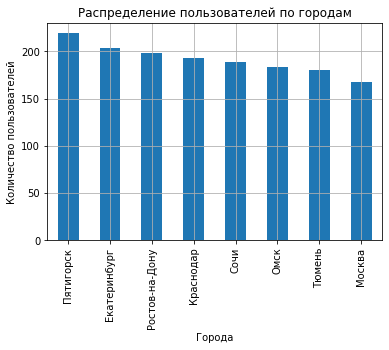

In [ ]:
data_users['city'].value_counts()

# построим столбчатую диаграмму
data_users['city'].value_counts().plot(kind = 'bar')
plt.grid(True)
plt.title('Распределение пользователей по городам')
plt.xlabel('Города')
plt.ylabel('Количество пользователей')

По данным можно сделать вывод, что наибольшее число пользователей свервиса проживает в Пятигорске (219), наименьшее число пользователей - в Москве (168).

Text(0, 0.5, 'Тип подписки')

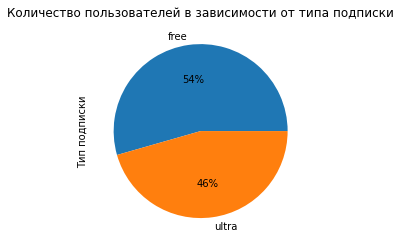

In [ ]:
data_users['subscription_type'].value_counts()

# построим диаграмму
data_users['subscription_type'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.grid(True)
plt.title('Количество пользователей в зависимости от типа подписки')
plt.ylabel('Тип подписки')

По данным видно, что больше пользователей (835 человек = 54%) не пользуются подпиской, в то время как подпиской ультра пользуются 699 (= 46%) человек.

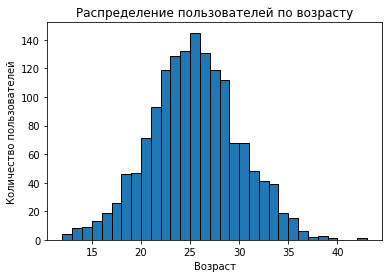

<AxesSubplot:>

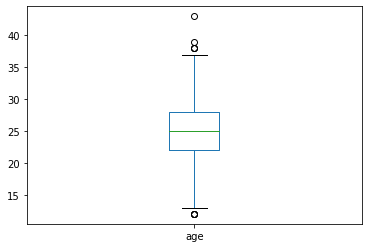

In [ ]:
data_users['age'].value_counts()

# построим диаграмму с сортировкой по увеличению возраста
plt.hist(data_users['age'], bins=range(12, 44), edgecolor='black')
plt.title('Распределение пользователей по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
None
plt.show()

# построим ящик с усами, чтобы увидеть, есть ли выбросы по возрасту
data_users['age'].plot(kind='box')

Больше всех среди пользователей людей в возрасте 25 лет, внушительная группа пользователей - 23-29 лет, совсем мало людей после 37 лет. Второй график показывает, что есть редкие, отходящие от нормы значения - пользователи возраста до 13 и после 37 лет.

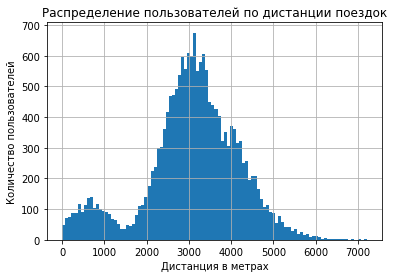

<AxesSubplot:>

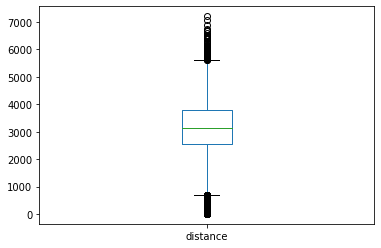

In [ ]:
data_rides['distance'].plot(kind='hist', bins=100)
plt.grid(True)
plt.title('Распределение пользователей по дистанции поездок')
plt.xlabel('Дистанция в метрах')
plt.ylabel('Количество пользователей')
plt.show()

# построим ящик с усами, чтобы увидеть, есть ли выбросы по дистанции
data_rides['distance'].plot(kind='box')

По гистограмме видно, что большая часть пользователей берет самокат на относительно далекие поездки — 2.5-3.5 км. Заметна так же группа пользователей, которые совершают на самокатах короткие поездки — до 1.5 км. Совсем малое число пользователей проезжают больше 5.5 км. График выбросов показывает, что поездки до 800 метров и больше 5500 метров являются редкими и выбивающимися значениями.

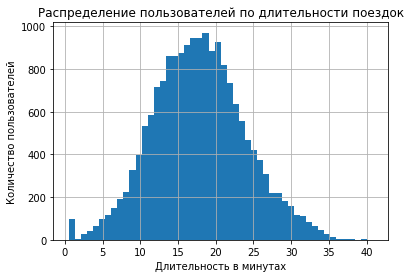

<AxesSubplot:>

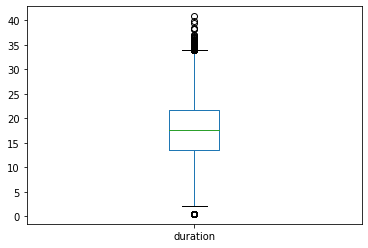

In [ ]:
data_rides['duration'].plot(kind='hist', bins=50)
plt.grid(True)
plt.title('Распределение пользователей по длительности поездок')
plt.xlabel('Длительность в минутах')
plt.ylabel('Количество пользователей')
data_rides['duration'].describe()
plt.show()

# построим ящик с усами, чтобы увидеть, есть ли выбросы по длительности поездок
data_rides['duration'].plot(kind='box')

Большинство пользователей используют самокат на протяжении 12-22 минут, в обе стороны по уменьшению и по увеличению времени количество пользователей уменьшается. Второй график показывает, что поездки до 3 минут и больше 33 минут являются редкими и выбивающимися значениями.

**Вывод:**
По результатам исследовательского анализа данных, мы сделали следующие выводы:

1. **Частота встречаемости городов:**
   По анализу данных о городах, в которых проживают пользователи, мы выяснили, что наибольшее число пользователей зарегистрировано в городе Пятигорске (219 человек), в то время как наименьшее количество пользователей в городе Москва (168 человек).

2. **Соотношение пользователей с подпиской и без подписки:**
   Мы установили, что большее количество пользователей (835 человек, что составляет 54%) не пользуются платными подписками, в то время как подпиской "ультра" пользуются 699 пользователей (что составляет 46%). Это может быть важной информацией для бизнеса, чтобы понять, как эффективно продвигать и стимулировать использование подписок.

3. **Возраст пользователей:**
   На основе анализа возрастных данных пользователей мы выяснили, что наибольшее количество пользователей относится к возрастной группе 25 лет. Значительная группа пользователей находится в возрастном диапазоне 23-29 лет, однако количество пользователей значительно уменьшается после 37 лет. Эта информация поможет сфокусироваться на молодой аудитории и разработать маркетинговые стратегии для привлечения пользователей старшего возраста.

4. **Расстояние, которое пользователь преодолел за одну поездку:**
   Анализ расстояния, преодоленного за одну поездку, показал, что большая часть пользователей предпочитает относительно дальние поездки в диапазоне 2.5-3.5 км. Также заметна группа пользователей, которые предпочитают короткие поездки до 1.5 км. Однако лишь небольшое число пользователей выбирает поездки более 5.5 км. Это знание может помочь оптимизировать размещение точек проката и разрабатывать специальные предложения для различных категорий пользователей.

5. **Продолжительность поездок:**
   Анализ продолжительности поездок показал, что большинство пользователей пользуются самокатами в течение 12-22 минут. С увеличением или уменьшением времени количество пользователей снижается. Это позволяет нам определить медианную продолжительность поездки (14 минут).

#### Шаг 4. Объединение данных

In [ ]:
# объединяем датафреймы с информацией о пользователе и его поездках, сохраняя все строки второго датасета
data_user_rides = data_users.merge(data_rides, on='user_id', how='right')

# объединим получившийся датасет с третьей таблицей с информацией о подписках
data = data_user_rides.merge(data_sub, on='subscription_type', how='left')
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [ ]:
# создаздим 2 датафрейма по типу подписок
# датафрейм с данными пользователей С подпиской
data_ultra = data.query('subscription_type == "ultra"')

# датафрейм с данными пользователей БЕЗ подписки
data_free = data.query('subscription_type == "free"')

In [ ]:
# проверим размерность датафреймов до объединения
data_users.shape # 1534 строки 5 столбцов
data_rides.shape # 18068 строк 5 столбцов
data_sub.shape # 2 строки 4 столбца

# проверим размерность датафреймов во время объединения
data_user_rides.shape # 18068 строк 9 столбцов

# проверим размерность объединенного датафрейма
data.shape # 18068 строк 12 столбцов

# проверим размерность датафрейма пользователей с подпиской
data_ultra.shape # 6500 строк 12 столбцов

# проверим размерность датафрейма пользователей без подписки
data_free.shape # 11568 строк 12 столбцов

(11568, 12)

Проверка размерности датафреймов говорит нам о корректном объединении и разделении датафреймов. Так, количество столбцов обосновывается тем, что сначала произошло слияние по 1 столбцу (`user_id`) => столбцов стало 5+5-1, затем добавился третий датафрейм с объединением по типу подписки (`subscription_type`) => 9+4-1 => 12 столбцов финального датафрейма. Колчиство строк так же доказывает, что процесс прошел корректно. При объединении датафреймов было важно сохранить данные по каждой поездки, поэтому в объединенном датафрейме 18 068 строк. Сумма датафреймов по типам подписки: 6500 + 11568 = 18068.

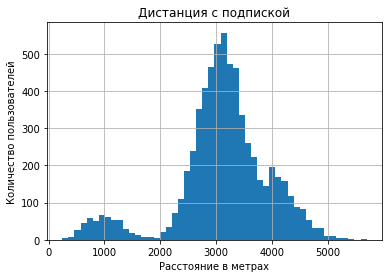

Text(0, 0.5, 'Количество пользователей')

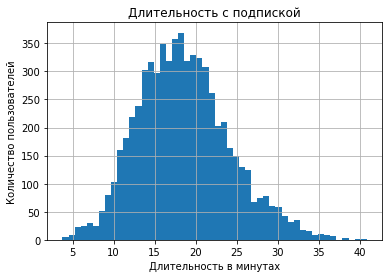

In [ ]:
# создадим 2 гистограммы, показывающие расстояние и время поездок пользователей С подпиской
# гистограмма дистанции
data_ultra['distance'].plot(kind='hist', bins=50)
plt.grid(True)
plt.title('Дистанция с подпиской')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество пользователей')
plt.show()

# гистограмма длительности
data_ultra['duration'].plot(kind='hist', bins=50)
plt.grid(True)
plt.title('Длительность с подпиской')
plt.xlabel('Длительность в минутах')
plt.ylabel('Количество пользователей')

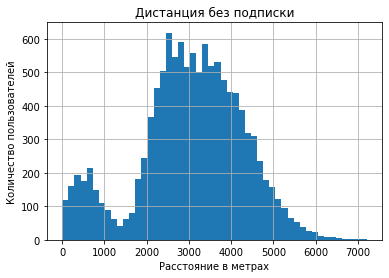

Text(0, 0.5, 'Количество пользователей')

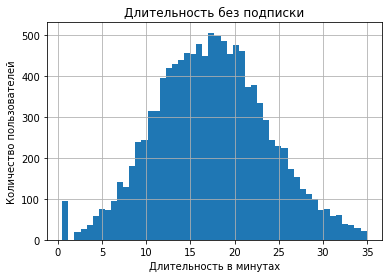

In [ ]:
# создадим 2 гистограммы, показывающие расстояние и время поездок пользователей БЕЗ подписки
# гистограмма дистанции
data_free['distance'].plot(kind='hist', bins=50)
plt.grid(True)
plt.title('Дистанция без подписки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество пользователей')
plt.show()

# гистограмма длительности
data_free['duration'].plot(kind='hist', bins=50)
plt.grid(True)
plt.title('Длительность без подписки')
plt.xlabel('Длительность в минутах')
plt.ylabel('Количество пользователей')

**Вывод:**
По результатам объединения данных и визуализации информации о поездках для пользователей с подпиской и без подписки, мы можем сделать следующие выводы:

1. **Объединение данных:**
   Объединили данные о пользователях, поездках и подписках в один общий датафрейм.

2. **Создание двух дополнительных датафреймов:**
   На основе общего датафрейма, мы создали еще два датафрейма для категоризации пользователей: один для пользователей без подписки и другой для пользователей с подпиской. Это дало нам возможность рассмотреть поведение и предпочтения обеих групп пользователей отдельно.

3. **Визуализация информации о расстоянии и времени поездок:**
   Анализ расстояния и времени поездок для пользователей с подпиской и без подписки позволил выявить интересные особенности. Пользователи с подпиской чаще совершают поездки на расстояние около 3.1 км, и их продолжительность в основном находится в интервале от 15 до 20 минут. В то же время, пользователи без подписки предпочитают поездки на расстояние около 2.5 км и также часто совершают поездки продолжительностью от 15 до 20 минут.

4. **Длительности поездок:**
   Мы заметили, что для обеих категорий пользователей характерно преобладание поездок продолжительностью от 15 до 20 минут. В то же время, пользователи без подписки реже совершают поездки менее 5 минут или продолжительностью более 35 минут. Также стоит отметить, что пользователи с подпиской редко совершают очень короткие поездки до 200 метров и очень длинные свыше 5 км.

#### Шаг 5. Подсчёт выручки

In [ ]:
# округлим все duration
data['duration'] = np.ceil(data['duration'])

# группируем данные по пользователю и месяцу, агрегируем данные по суммарному расстоянию, количеству поездок и суммарному времени
rides = data.groupby(['user_id', 'month']).agg({
    'distance': ['sum', 'count'],
    'duration': 'sum',
    'subscription_type': 'first',
}).reset_index()

# переименование столбцов
rides.columns = ['user_id', 'month', 'distance', 'ride_count', 'duration', 'subscription_type']

rides.head()

,user_id,month,distance,ride_count,duration,subscription_type
0,1,1,7027.511294,2,42.0,ultra
1,1,4,754.159807,1,7.0,ultra
2,1,8,6723.470560,2,46.0,ultra
3,1,10,5809.911100,2,32.0,ultra
4,1,11,7003.499363,3,56.0,ultra


In [ ]:
rides.isna().sum()

user_id              0
month                0
distance             0
ride_count           0
duration             0
subscription_type    0
dtype: int64

In [ ]:
# создадим функцию, которая будет считать выручку за каждого пользователя и за каждый месяц
def calculate_result(row):
    if row['subscription_type'] == 'ultra':
        return 199 + 6 * row['duration']
    elif row['subscription_type'] == 'free':
        return 50 * row['ride_count'] + 8 * row['duration']

rides['revenue'] = rides.apply(calculate_result, axis=1)
rides

,user_id,month,distance,ride_count,duration,subscription_type,revenue
0,1,1,7027.511294,2,42.0,ultra,451.0
1,1,4,754.159807,1,7.0,ultra,241.0
2,1,8,6723.470560,2,46.0,ultra,475.0
3,1,10,5809.911100,2,32.0,ultra,391.0
4,1,11,7003.499363,3,56.0,ultra,535.0
...,...,...,...,...,...,...,...
11326,1534,6,3409.468534,2,26.0,free,308.0
11327,1534,8,7622.453034,2,48.0,free,484.0
11328,1534,9,4928.173852,1,23.0,free,234.0
11329,1534,11,13350.015305,4,78.0,free,824.0


In [ ]:
rides['revenue'].describe()

count    11331.000000
mean       342.303504
std        153.875346
min         58.000000
25%        234.000000
50%        319.000000
75%        415.000000
max       1444.000000
Name: revenue, dtype: float64

In [ ]:
# рассмотрим данные по выручке людей с подпиской
rides.query('subscription_type == "ultra"')['revenue'].describe()

# рассмотрим данные по выручке людей без подписки
rides.query('subscription_type == "free"')['revenue'].describe()

count    6798.000000
mean      328.641365
std       183.868330
min        58.000000
25%       194.000000
50%       274.000000
75%       428.000000
max      1444.000000
Name: revenue, dtype: float64

**Вывод:**
По результатам подсчета выручки, мы получили следующую информацию о помесячной выручке, которую принес каждый пользователь:

1. **Пользователи с подпиской:**
   - Минимальная помесячная выручка среди пользователей с подпиской составляет 223 рубля.
   - Максимальная — 943 рубля.
   - В среднем пользователи с подпиской тратят в месяц 361 рубль.


2. **Пользователи без подписки:**
   - Минимальная помесячная выручка среди пользователей без подписки составляет 58 рублей.
   - Максимальная — 1428 рублей.
   - В среднем пользователи без подписки тратят в месяц 326 рублей.

Эти данные позволяют нам оценить эффективность подписки и выявить, какие пользователи приносят наибольший доход компании. Пользователи с подпиской в среднем тратят больше, чем пользователи без подписки, что может свидетельствовать об успешности маркетинговых акций и лояльности подписчиков. Также эта информация помогает нам определить, насколько важно привлекать новых пользователей к использованию платных подписок для увеличения общей выручки сервиса аренды самокатов GoFast.

#### Шаг 6. Проверка гипотез

**6.1. Тратят ли пользователи с подпиской больше времени на поездки?**

Для решения данного вопроса необходимо проверить гипотезу о равенстве средних двух генеральных совокупностей.

H0: Длительность с подпиской = длительность без подписки

H1: Длительность с подпиской > длительность без подписки

За alpha возьмем 0.05

In [ ]:
ultra = data_ultra['duration']
free = data_free['duration']
alpha = .05

results = st.ttest_ind(ultra, free, alternative='greater')

print('pvalue =', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отверагем нулевую гипотезу')

pvalue = 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**Вывод:** Есть основания говорить, что пользователи с подпиской тратят больше времени на поездки на самокатах.

**6.2 Превышает ли расстояние, которое проезжают пользователи с подпиской за одну поездку, оптимальное значение?**

Проверяется гипотеза о равенстве среднего генеральной совокупности числу.

H0: Дистанция = 3130

H1: Дистанция < 3130

In [ ]:
dist = data_ultra['distance']
interested_dist = 3130

alpha = .05

results = st.ttest_1samp(dist, interested_dist, alternative='greater')

print('pvalue =', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

pvalue = 0.9195368847849785
Не отвергаем нулевую гипотезу


**Вывод:** Пользователи с подпиской проезжают на самокатах около 3130 метров, однако мы не можем точно сказать, что пользователи не проезжают больше 3130 метров.

**6.3 Будет ли помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки?**

Для решения данного вопроса необходимо проверить гипотезу о равенстве средних двух генеральных совокупностей.

H0: Выручка с подпиской = выручка без подписки

H1: Выручка с подпиской > выручка без подписки

In [ ]:
revenue_ultra = rides.query('subscription_type == "ultra"')['revenue']
revenue_free = rides.query('subscription_type == "free"')['revenue']

alpha = .05

results = st.ttest_ind(revenue_ultra, revenue_free, alternative='greater')

print('pvalue =', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

pvalue = 1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Вывод:** Полученное значение pvalue очень маленькое, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

**6.4. Проверка гипотезы о снижении обращений в поддержку.**

Допустим, что техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобился бы для проверки этой гипотезы?

Данная гипотеза называется гипотезой о равенстве средних для зависимых (парных) выборок, так как нам нужно сравнить 1 выборку до и после обновления.

Гипотезы составляются следующим образом:

H0: Количество обращений в техподдержку до обновления == количество обращений после

H1: Количество обращений в техподдержку до обновления != количество обращений после

Проверка осуществляется методом: `st.ttest_rel(before, after)`

**Вывод:**
 По результатам проверки гипотез, мы пришли к следующим выводам:

1. **Тратят ли пользователи с подпиской больше времени на поездки?**
   Значение p-value позволяет нам отвергнуть нулевую гипотезу о том, что пользователи с подпиской и пользователи без подписки тратят одинаковое количество времени на поездки. Таким образом, у нас есть основания полагать, что пользователи с подпиской действительно тратят больше времени на поездки на самокатах.

2. **Превышает ли расстояние, которое проезжают пользователи с подпиской за одну поездку, оптимальное значение?**
   Мы не можем с уверенностью утверждать, что пользователи с подпиской превышают оптимальное расстояние в 3130 метров за одну поездку. Значение p-value не достаточно низкое, чтобы отвергнуть нулевую гипотезу об отсутствии различий между пользователями с подпиской и оптимальным значением расстояния.

3. **Будет ли помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки?**
   Очень маленькое значение p-value позволяет нам отвергнуть нулевую гипотезу о том, что помесячная выручка от пользователей с подпиской и без подписки равна. Это означает, что есть основания полагать, что помесячная выручка от пользователей с подпиской по месяцам действительно выше, чем выручка от пользователей без подписки.

## Вывод

**Общий вывод по проекту "Анализ данных сервиса аренды электросамокатов GoFast":**

Проект представляет анализ данных сервиса аренды электросамокатов GoFast. Доступ к данным предоставлен в виде трех датасетов: информация о пользователях (1565 строк, 5 признаков), данные о поездках (18068 строк, 4 признака) и информация о видах подписок (2 строки, 4 признака).

Для начала была выполнена предобработка данных. Преобразовали тип данных в столбце "date" из даты в формате строки в тип данных даты (datetime) для удобства работы с временными данными. Создали новый столбец "month" на основе столбца "date" для возможности анализа данных по месяцам. Проверили датасеты на наличие пропущенных значений. Обнаруженные дубликаты в первом датасете были успешно удалены.

В ходе исследовательского анализа данных, мы получили следующие результаты:

- Частота встречаемости городов: Наибольшее число пользователей сервиса проживает в городе Пятигорск (219 пользователей), а наименьшее число - в Москве (168 пользователей).

- Соотношение пользователей с подпиской и без подписки: 54% пользователей не пользуются подпиской, в то время как 46% предпочитают использовать подписку ультра.

- Возраст пользователей: Наибольшее число пользователей находится в возрастной группе 23-29 лет, меньше всего пользователей после 37 лет.

- Расстояние, которое пользователь преодолевает за одну поездку: Большая часть пользователей предпочитает дистанции от 2.5 до 3.5 км, а также короткие поездки до 1.5 км. Совсем небольшое число пользователей проезжает более 5.5 км.

- Продолжительность поездок: Большинство пользователей предпочитает поездки длительностью от 12 до 22 минут, в то время как количество пользователей уменьшается при увеличении или уменьшении времени поездки.

По итогам объединения и разделения датасетов мы смогли подсчитать выручку за каждого пользователя по месяцам. Подсчет выручки показал, что среди пользователей с подпиской минимум составляет 223 рубля, максимум - 943 рубля, а в среднем пользователи тратят в месяц 361 рубль. Среди пользователей без подписки минимальное значение - 58 рублей, максимальное - 1428 рублей, а средняя выручка составляет 326 рублей.

Мы провели проверку нескольких гипотез и получили следующие результаты:

- Тратят ли пользователи с подпиской больше времени на поездки? Да, есть основания говорить, что пользователи с подпиской тратят больше времени на поездки на самокатах.

- Превышает ли расстояние, которое проезжают пользователи с подпиской за одну поездку, оптимальное значение? Пользователи с подпиской используют примерно 3130 метров за поездку, что близко к оптимальному значению, но мы не можем однозначно утверждать, что пользователи не проезжают больше.

- Будет ли помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки? Да, полученное значение p-value позволяет отвергнуть нулевую гипотезу и сделать вывод, что помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.


В ходе данного исследования данных сервиса аренды электросамокатов GoFast, мы проанализировали различные характеристики пользователей и их поездок, выявили особенности поведения и предпочтений пользователей, а также оценили эффективность подписки в контексте выручки. Полученные результаты предоставляют ценные инсайты для улучшения бизнес-процессов.

На основе проведенного анализа данных можно сформулировать некоторые рекомендации по развитию аренды самокатов:

- Стоит обратить внимание на привлечение пользователей старше 30 лет, так как из анализа данных видно, что сейчас среди пользователей наибольшее количество людей в возрастной группе 23-29 лет, а количество пользователей после 37 лет меньше. Привлечение пользователей старшей возрастной группы может значительно расширить клиентскую базу и увеличить выручку сервиса.

- Также, уделить больше внимания промоакциям и маркетинговым кампаниям для молодежи (основная и наибольшая группа пользователей) было бы целесообразно, учитывая, что наибольшее количество пользователей предпочитает не использовать подписку. Акции и промокоды могут стать мощным мотиватором для молодых пользователей испытать сервис и в дальнейшем стать постоянными клиентами.

- Нужно обратить внимание на тех пользователей, которые не продлевают свою подписку после пробного периода. Изучить причины отказов и предпринять меры для улучшения условий использования сервиса, чтобы повысить удержание пользователей.